In [95]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [96]:
pca=pd.read_csv("/content/drive/MyDrive/769/a3/DataPCA.csv")
kpca = pd.read_csv("/content/drive/MyDrive/769/a3/DataKPCA.csv")
clustering = pd.read_csv("/content/drive/MyDrive/769/a3/DataClustering.csv")

**1. Clustering:**

In [97]:
#1a. Visualize and pre-process the data as appropriate from the file DataClustering.csv.
print("Rows, columns: " + str(clustering.shape))
clustering.head()

Rows, columns: (351, 4)


,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


In [98]:
print(clustering.isna().sum())
print(pca.isna().sum())
print(kpca.isna().sum())

x1    0
x2    0
x3    0
x4    0
dtype: int64
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64


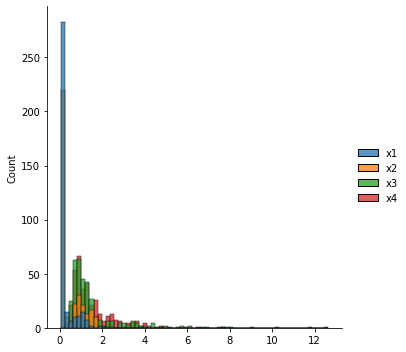

In [99]:

sns.displot(clustering)


In [100]:
clustering.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


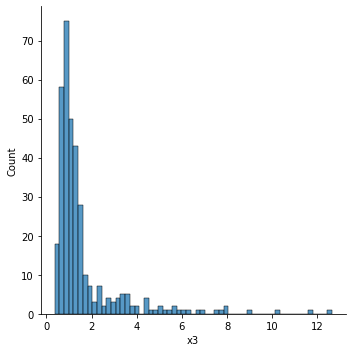

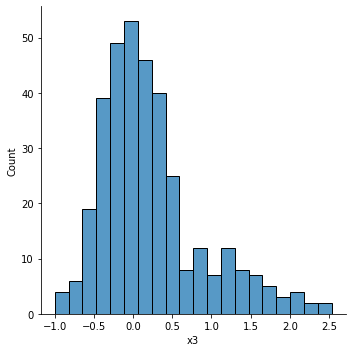

In [101]:
#using log transform
clustering_log= np.log(clustering)
sns.displot(clustering['x3'])
sns.displot(clustering_log['x3'])

In [102]:
#1b. Train k-means, and find the appropriate number of k.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clustering_log)
    Sum_of_squared_distances.append(km.inertia_)

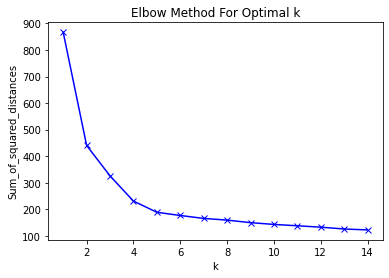

In [103]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=4 indicating the optimal k for this dataset is 4

In [104]:
km = KMeans(n_clusters=4)
km = km.fit(clustering_log)
print(km.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3]


In [105]:
np.unique(km.labels_)

array([0, 1, 2, 3], dtype=int32)

In [108]:
#1c. Train DBSCAN, and see if by varying MinPts and ε, you can get the same number of clusters as k-means.

dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan = dbscan.fit(clustering_log)
print(dbscan.labels_)
np.unique(dbscan.labels_)

[ 0  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0  0 -1  0  0 -1
  0  0  0 -1  0 -1 -1  0  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0 -1  0
 -1  0  0  0  0  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1
  1  1  2  2 -1  2  2  2  2  2  2  2  2  2 -1  2 -1  2  2  2  2  2  2  2
 -1  2  2  2  2 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2 -1 -1  2  2  2  2  2 -1  2  2  2  2  2  2  2  2
  2  2 -1  2  2  2  2  2  2  2  2 -1  2  2  2  2 -1  2  2  2  2  2  2 -1
  2 -1 -1 -1  2  2 -1 -1  2  2  2 -1 -1 -1 -1  2 -1  2 -1 -1  2 -1  2  2
 -1 -1  2  2  2 -1  2 -1  2 -1  2  2  2 -1  2  2 -1  2  2 -1  2 -1 -1  2
  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2 -1  2  2  2  2 -1  2  2  2  2  2  2  2 -1 -1  2  2
  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2

array([-1,  0,  1,  2])

For MinPts = 5 and ε = 0.5 we get 4 clusters

In [109]:
clustering_log['labels']=dbscan.labels_
clustering_log
clustering_log_wolabels = clustering_log.drop('labels',axis=1)

In [110]:
#1d.Using the cluster assignment as the label, visualize the t-sne embedding.

model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(clustering_log_wolabels)
tsne_features[1:4,:]

array([[ 20.819666, -36.69493 ],
       [ 20.380646, -35.170074],
       [ 21.34717 , -35.816025]], dtype=float32)

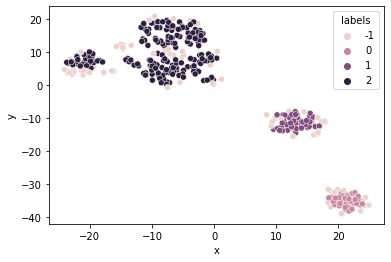

In [111]:
clustering_log['x']=tsne_features[:,0]
clustering_log['y']=tsne_features[:,1]
sns.scatterplot(x='x',y='y',hue='labels',data=clustering_log)
plt.show()

**2. PCA:**

In [112]:
#2a. Visualize and preprocessing the data from the file DataPCA.csv
print("Rows, columns: " + str(pca.shape))
pca.head()

Rows, columns: (190, 7)


,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


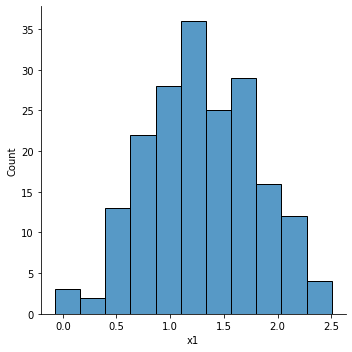

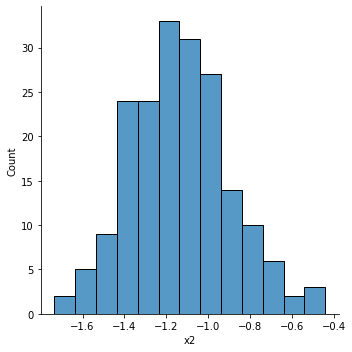

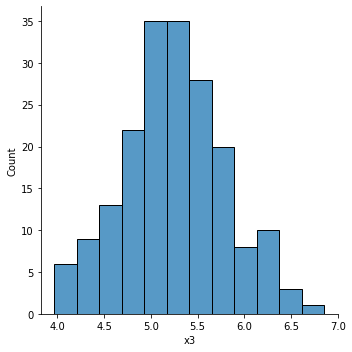

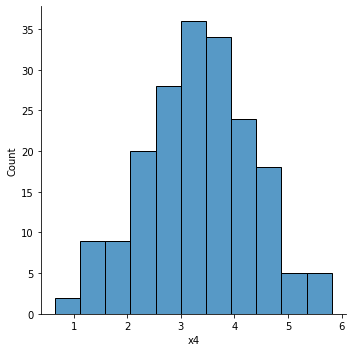

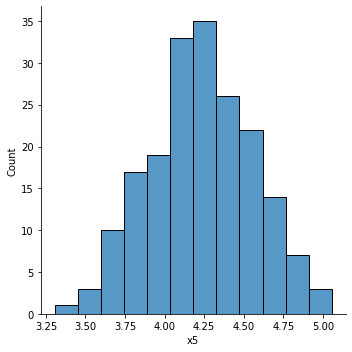

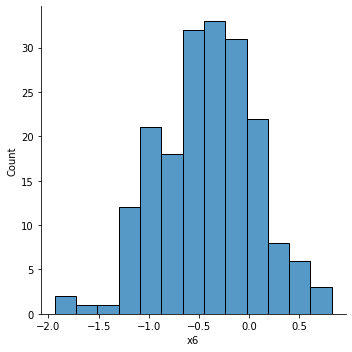

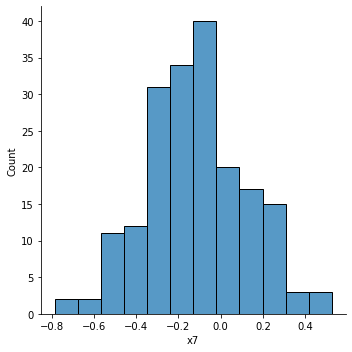

In [113]:
sns.displot(pca['x1'])
sns.displot(pca['x2'])
sns.displot(pca['x3'])
sns.displot(pca['x4'])
sns.displot(pca['x5'])
sns.displot(pca['x6'])
sns.displot(pca['x7'])

In [114]:
pca.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


In [115]:

# Standardize the features
pca_scaled = StandardScaler().fit_transform(pca)

# Preview X
pd.DataFrame(data=pca_scaled).head()

,0,1,2,3,4,5,6
0,-0.879702,0.203581,-0.717812,0.937130,0.240310,0.572178,0.817830
1,0.066901,-0.164833,-0.013778,-0.047812,0.151606,0.102283,-0.215624
2,0.495178,-0.172416,0.550176,0.052044,-0.800676,-0.988900,0.835247
3,-1.819170,0.021640,-1.688840,2.220573,0.934360,1.570859,1.551955
4,0.554357,0.089743,0.524348,-0.855438,-0.236998,-0.409231,-0.720773


In [116]:
#2b. Train PCA.

# Import PCA from sklearn
from sklearn.decomposition import PCA
nComp =4 # no of components
# Instantiate PCA
PCA_model = PCA(n_components=nComp)

# Fit PCA to features
principalComponents = PCA_model.fit_transform(pca_scaled)

In [117]:
print('Variance of each component:', PCA_model.explained_variance_ratio_)
print('\n Total Variance Explained:',
      round(sum(list(PCA_model.explained_variance_ratio_))*100, 2))

Variance of each component: [0.60927057 0.31946097 0.0649562  0.00607239]

 Total Variance Explained: 99.98


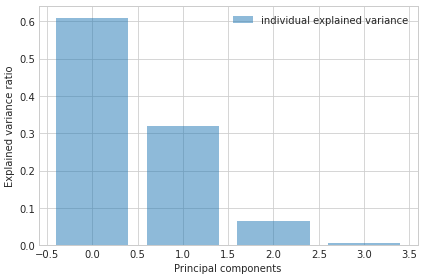

In [118]:
#2c.Plot the variance explained versus PCA dimensions.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(nComp), PCA_model.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [119]:
#2d.Reconstruct the data with various numbers of PCA dimensions
mu = np.mean(pca_scaled, axis=0)
#Reconstructing Data using principal components
Xhat = np.dot(PCA_model.transform(pca_scaled)[:,:nComp], PCA_model.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])
print(pca_scaled[0,])

[-0.88682399  0.20154498 -0.70850629  0.93852495  0.24374925  0.57074168
  0.81704625]
[-0.87970185  0.20358106 -0.7178119   0.93713018  0.24030982  0.572178
  0.81782988]


In [120]:
#2d calculating the mse
difference_array = np.subtract(Xhat, pca_scaled)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

0.00023987869019137444


**3. Non-linear dimension reduction:**

In [121]:
#3a. visualising and preprocessing the data
print("Rows, columns: " + str(kpca.shape))
kpca.head()

Rows, columns: (190, 7)


,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


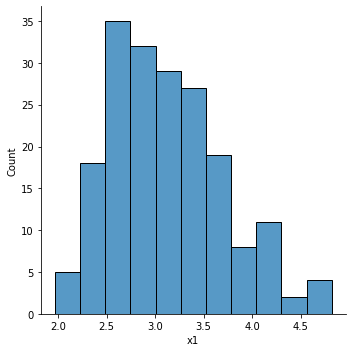

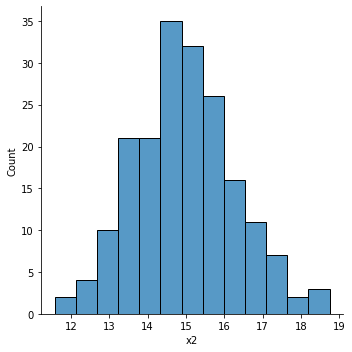

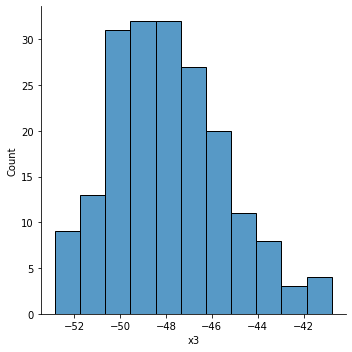

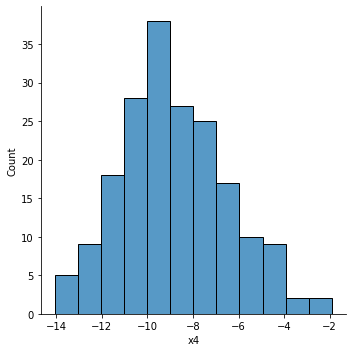

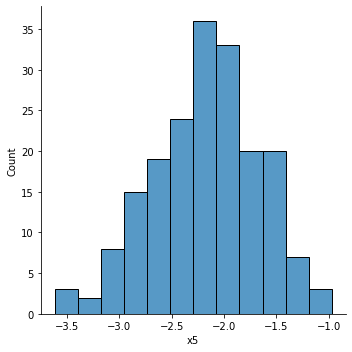

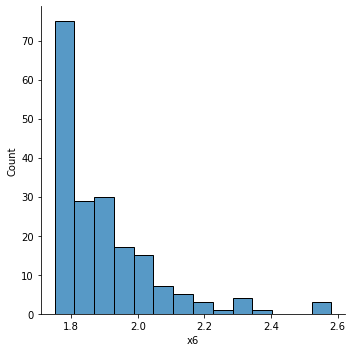

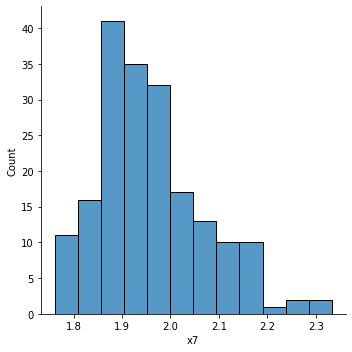

In [122]:
sns.displot(kpca['x1'])
sns.displot(kpca['x2'])
sns.displot(kpca['x3'])
sns.displot(kpca['x4'])
sns.displot(kpca['x5'])
sns.displot(kpca['x6'])
sns.displot(kpca['x7'])

In [123]:
# Standardize the features
kpca_scaled = StandardScaler().fit_transform(kpca)

# Preview X
pd.DataFrame(data=kpca_scaled).head()

,0,1,2,3,4,5,6
0,-0.893531,0.214228,0.660423,-0.935894,-0.180173,0.263020,0.750311
1,-0.043014,-0.155081,-0.108467,0.005283,-0.089272,-0.268499,-0.334918
2,0.406310,-0.162711,-0.636915,-0.093875,0.823388,-0.884520,0.771011
3,-1.543484,0.032201,1.919837,-2.039160,-0.926059,1.924996,1.692138
4,0.471557,0.100418,-0.614413,0.838262,0.297131,-0.664890,-0.762999


In [127]:
#3b. Train KPCA.
from sklearn.decomposition import KernelPCA
kpca = KernelPCA( n_components=4)
kpca_transform = kpca.fit_transform(kpca_scaled)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

In [128]:
explained_variance_ratio

array([0.58049887, 0.32075611, 0.0714466 , 0.02729842])

Text(0.5, 0, 'Principal components ')

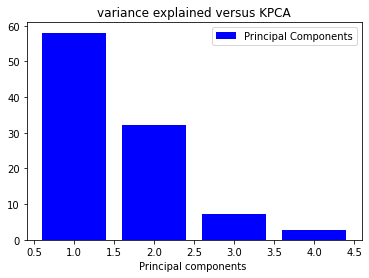

In [129]:
    #3c. Plot the variance explained versus KPCA dimensions for up to 10 dimensions.
    plt.bar([1,2,3,4],list(explained_variance_ratio*100),label='Principal Components',color='b')
    plt.legend()
    plt.title('variance explained versus KPCA')
    plt.xlabel('Principal components ')